In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid',font_scale=1.5)
import warnings
warnings.filterwarnings('ignore')

# Modeling Library 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [5]:
# Importing Datasets
d=sns.load_dataset('iris')

In [6]:
# Basic information of dataset
d.shape

(150, 5)

In [7]:
# Checking for duplicate value
d.duplicated().sum()

1

In [8]:
# Droping duplicates
d=d.drop_duplicates()

In [9]:
d.dtypes.to_frame().rename(columns={0:'Data Types'})
# All the predictors are numerical

,Data Types
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [10]:
# checking for null values
d.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
# lets begin with data analysis.

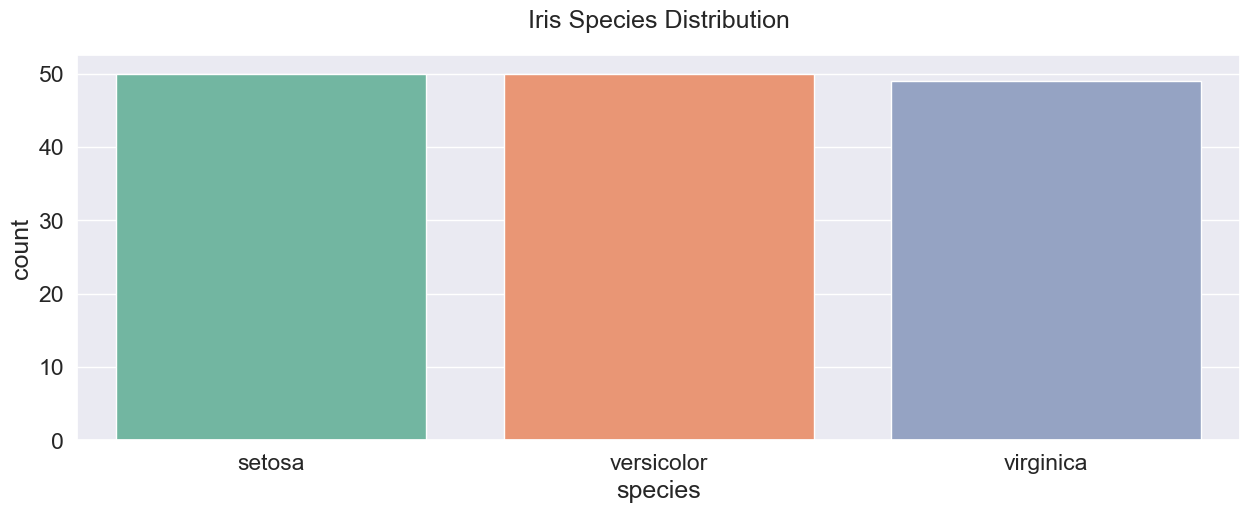

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(d["species"],palette="Set2")
plt.title("Iris Species Distribution",pad=20)
plt.show()

### Observation

1. We can observe that all the species are having equal records.
2. So we can make a conclusion that our target is having class-balanced.
3. So we don't have to use techniques like over_sampling or under_Sampling.

In [13]:
for i in d.columns:
    print(i)

sepal_length
sepal_width
petal_length
petal_width
species


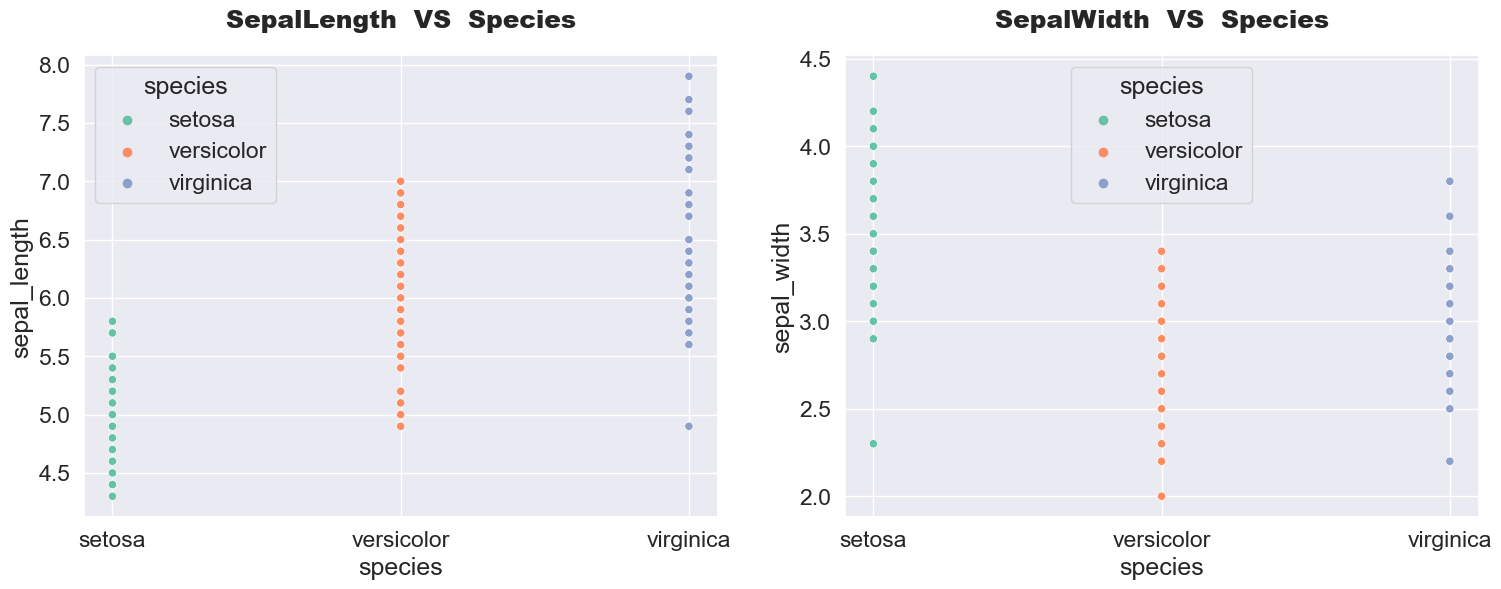

In [14]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot("species","sepal_length",data=d,hue="species",palette="Set2")
plt.title("SepalLength  VS  Species",pad=20,fontweight="black")
plt.subplot(1,2,2)
sns.scatterplot("species","sepal_width",data=d,hue="species",palette="Set2")
plt.title("SepalWidth  VS  Species",pad=20,fontweight="black")
plt.show()

# Sepal
* **Setosa**
    * 4.25 < sepal_length < 6  
    * 2.80 < sepal_width < 4.5
    * Smallest => sepal_length
    * largest  => sepal_width

*  **Versicolor**
    * 4.8 < sepal_length < 7
    * 2.0 < sepal_width < 3.4
    * Smallest => Sepal_width
 
* **Virginica** 
    * 5.50 < sepal_length < 8  
    * 2.80 < sepal_width < 4.5
    * Largest => sepal_length

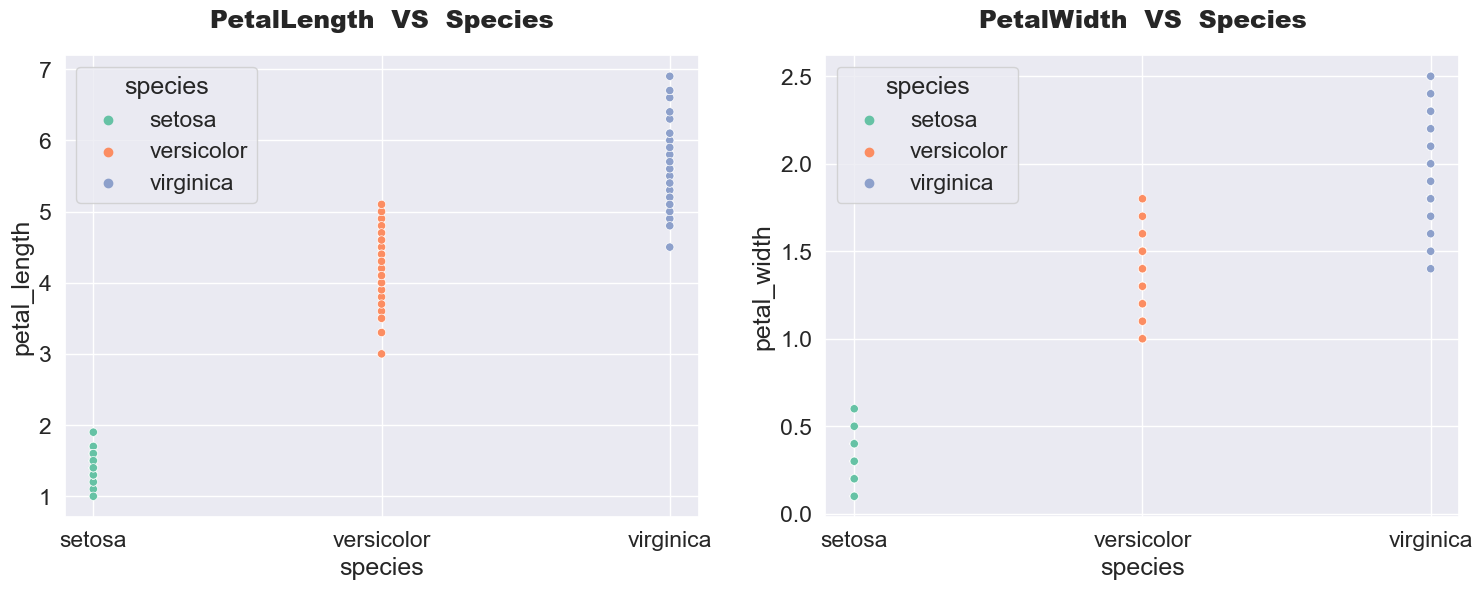

In [15]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot("species","petal_length",data=d,hue="species",palette="Set2")
plt.title("PetalLength  VS  Species",pad=20,fontweight="black")
plt.subplot(1,2,2)
sns.scatterplot("species","petal_width",data=d,hue="species",palette="Set2")
plt.title("PetalWidth  VS  Species",pad=20,fontweight="black")
plt.show()

### Observation

1. For **Iris-setosa** we can observe that this flower species are having **petal length less than 2cm** and **Petal width less than 1cm**.
2. **Iris-setosa** is having the smallest **Petal length** & **Petal Width** among the three species.
3. For **Iris-versicolor** we can observe that the **Petal length is greater than 3cm but less than 5.5cm** and **Petal width more than 1cm and less than 2cm**.
4. **Iris-versicolor** is having the almost avergae values for **Petal width** & **Petal Length**.
5. For **Iris-Virginica** we can observe that the **Petal length is more than 4cm** and **Petal width more than 1cm**.
6. **Iris-versicolor** is having the largest **Petal length** & **Petal Width**.

In [16]:
# Dividing the whole dataset into training and testing dataset.

X=d.drop(columns='species')
y=d.species

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=.20,stratify=y)

In [17]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [18]:
pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)

In [28]:
# Checking train accuracy
print('Accuracy on Training Data is: ',round(accuracy_score(ytrain,pred_train)*100,2))

Accuraacy on Training Data is:  96.64


In [31]:
# Checking test accuracy
print('Accuracy on Testing Data is: ',round(accuracy_score(ytest,pred_test)*100,2))

Accuraacy on Testing Data is:  100.0


### Obseravtion

1. We can clearly observe that we got an accuracy of **96.6 on training data** and **100 on testing data**.
2. So we can conclude that our model is having a kind of **best fitting**.

In [21]:
# Generating Confusion matrix
cm=confusion_matrix(ytest,pred_test)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

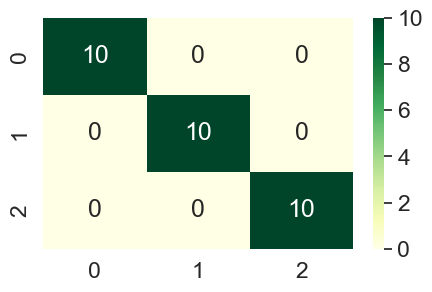

In [35]:
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,cmap='YlGn')
plt.show()

## Summary
Iris Flower Classification using Machine Learning

Key-Points

💡 First we did **Data Preparation** and loaded all the libraries and datasets reuired for classifcation.

💡 Then we performed **Exploratory Data Analysis** using different visualization techniques and generated some insights.

💡 Then we performed **Data Preprocessing** to make raw data suitable for model training. 

💡 Then we performed **Model building** and trained our model using **Logistic Regression Algorithm**.

💡 Then we performed **Model Evaluation** and in the end we generated a model with accuracy of **100** on testing data.